In [1]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime

#!pip install plotly
import plotly.express as px #high level interface
import plotly.graph_objects as go #Lower level interface

In [2]:
#Things to keep in mind to do time series(financial) forecasting
#Every data should be numberical in nature
#Data type is correct or not- make sure DateTime column and Target Variable (VWAP)
#There should be Date and Time dependencies 
#There should not be missing data, if there, impute it.
#Data should be in sequence - Time Series should be in ascending order.
#We have to check that whether in given data, we have trend, Seasonality, Cyclicity and Irregular data(Noise/Error)


In [3]:
#Creating pandas DF
#importing the DATA
df = pd.read_csv('YahooFinance.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
#Checking metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [5]:
#Converting date column, from 'object' to 'DateTime'
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#Checking the data again(Meta Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

In [7]:
#Checking value counts of unique value
df['Symbol'].value_counts()

IOC           5306
CIPLA         5306
M&M           5306
ICICIBANK     5306
ONGC          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: Symbol, Length: 65, dtype: int64

In [8]:
#Checking Columns
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
#Getting the required columns 
df = df[['Date', 'Symbol', 'Open', 'High', 'Low','Close', 'VWAP','Volume']]
df.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
0,2007-11-27,MUNDRAPORT,770.00,1050.00,770.0,962.90,984.72,27294366
1,2007-11-28,MUNDRAPORT,984.00,990.00,874.0,893.90,941.38,4581338
2,2007-11-29,MUNDRAPORT,909.00,914.75,841.0,884.20,888.09,5124121
3,2007-11-30,MUNDRAPORT,890.00,958.00,890.0,921.55,929.17,4609762
4,2007-12-03,MUNDRAPORT,939.75,995.00,922.0,969.30,965.65,2977470


In [10]:
#Checking the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    235192 non-null  datetime64[ns]
 1   Symbol  235192 non-null  object        
 2   Open    235192 non-null  float64       
 3   High    235192 non-null  float64       
 4   Low     235192 non-null  float64       
 5   Close   235192 non-null  float64       
 6   VWAP    235192 non-null  float64       
 7   Volume  235192 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 14.4+ MB


In [11]:
#Checking duplicate values in the data
df.duplicated().sum()

0

In [12]:
#Checking if there is any null value
df.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
VWAP      0
Volume    0
dtype: int64

# Durbin-Watson Test (To check for Auto-Correlation)


In [13]:
#If durbin-watson test is 2 then there is no auto-correlation and you can do Liner Regression.
#Test Value is between 0 and 4
#if value is less than 1.5 or greater than 2.5, we can do time series analysis.
#Negative value indicates that there is a lot of fluctuation.
import statsmodels.api as sm
print(sm.stats.durbin_watson(df['VWAP']))
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))
print(sm.stats.durbin_watson(df['Volume']))
print(sm.stats.durbin_watson(df['High']))
print(sm.stats.durbin_watson(df['Low']))

0.0014277598023373546
0.0015870073457078119
0.0015201473988800853
-1.6285414945629082
0.0014694358123648094
0.0015302998074600996


###### Yes there is Auto-Correlation
    If value is ~2, that means there is no auto-correlation and we can perform regression on it.
    
    Else, we cannot do regression but we can do time series analysis

In [14]:
df.describe()

,Open,High,Low,Close,VWAP,Volume
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05
mean,1267.759708,1286.581440,1247.488465,1266.554351,1267.13230,3.045903e+06
std,2585.259609,2619.649216,2546.621396,2582.140942,2582.69998,7.333981e+06
min,8.500000,9.750000,8.500000,9.150000,9.21000,3.000000e+00
25%,275.000000,279.500000,269.600000,274.350000,274.69750,2.190095e+05
50%,567.025000,576.900000,556.500000,566.700000,566.94000,1.010938e+06
75%,1243.312500,1263.000000,1221.650000,1242.400000,1242.66250,3.019851e+06
max,33399.950000,33480.000000,32468.100000,32861.950000,32975.24000,4.810589e+08


In [15]:
df.nunique()

Date        5306
Symbol        65
Open       44298
High       49036
Low        51335
Close      63739
VWAP      138831
Volume    220434
dtype: int64

In [16]:
#Copying the DataFrame so that we do not make changes to raw data
df1 = df.copy()

In [17]:
#Setting index of new Date as index of new Data Frame
df1.set_index('Date', inplace=True)

In [18]:
#Checking the Data Frame
df1

,Symbol,Open,High,Low,Close,VWAP,Volume
Date,,,,,,,
2007-11-27,MUNDRAPORT,770.00,1050.00,770.00,962.90,984.72,27294366
2007-11-28,MUNDRAPORT,984.00,990.00,874.00,893.90,941.38,4581338
2007-11-29,MUNDRAPORT,909.00,914.75,841.00,884.20,888.09,5124121
2007-11-30,MUNDRAPORT,890.00,958.00,890.00,921.55,929.17,4609762
2007-12-03,MUNDRAPORT,939.75,995.00,922.00,969.30,965.65,2977470
...,...,...,...,...,...,...,...
2021-04-26,ZEEL,190.60,191.10,185.10,186.40,187.35,8542755
2021-04-27,ZEEL,188.00,192.95,186.80,188.15,189.41,14247767
2021-04-28,ZEEL,188.80,190.60,187.10,189.10,188.85,8429439


In [19]:
#Checking Minimum and Maximum date value
start_date = df1.index.min()
end_date = df1.index.max()
print("Start date of Stocks: ", start_date)
print("End date of stocks: ", end_date)

Start date of Stocks:  2000-01-03 00:00:00
End date of stocks:  2021-04-30 00:00:00


<Axes: xlabel='Date'>

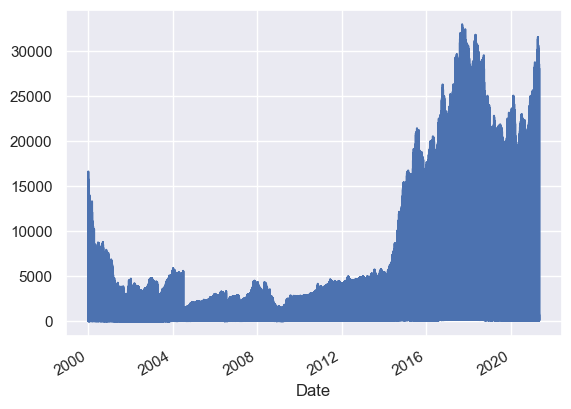

In [20]:
#Plotting 'VWAP' with date
df1['VWAP'].plot()

In [21]:
#Getting a specific stock
stock_name = 'IOC'

In [22]:
df1

,Symbol,Open,High,Low,Close,VWAP,Volume
Date,,,,,,,
2007-11-27,MUNDRAPORT,770.00,1050.00,770.00,962.90,984.72,27294366
2007-11-28,MUNDRAPORT,984.00,990.00,874.00,893.90,941.38,4581338
2007-11-29,MUNDRAPORT,909.00,914.75,841.00,884.20,888.09,5124121
2007-11-30,MUNDRAPORT,890.00,958.00,890.00,921.55,929.17,4609762
2007-12-03,MUNDRAPORT,939.75,995.00,922.00,969.30,965.65,2977470
...,...,...,...,...,...,...,...
2021-04-26,ZEEL,190.60,191.10,185.10,186.40,187.35,8542755
2021-04-27,ZEEL,188.00,192.95,186.80,188.15,189.41,14247767
2021-04-28,ZEEL,188.80,190.60,187.10,189.10,188.85,8429439


In [23]:
#GEtting the data of one particular stock(IOC)
df2 = df1[df1['Symbol']==stock_name]

In [24]:
df2

,Symbol,Open,High,Low,Close,VWAP,Volume
Date,,,,,,,
2000-01-03,IOC,260.00,273.25,250.00,270.85,258.55,23700
2000-01-04,IOC,260.00,268.00,254.10,264.40,259.80,24400
2000-01-05,IOC,264.90,265.00,257.00,261.30,260.66,18900
2000-01-06,IOC,258.00,263.00,256.05,260.10,259.81,18150
2000-01-07,IOC,259.90,267.00,253.25,264.45,260.11,17650
...,...,...,...,...,...,...,...
2021-04-26,IOC,88.70,88.80,87.75,88.20,88.28,7066681
2021-04-27,IOC,88.20,89.10,88.20,88.85,88.76,8752415
2021-04-28,IOC,89.20,89.55,89.00,89.40,89.29,6336704


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Close   5306 non-null   float64
 5   VWAP    5306 non-null   float64
 6   Volume  5306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 331.6+ KB


In [26]:
df2['Symbol'].nunique()

1

In [27]:
df2.shape

(5306, 7)

In [ ]:
#checking min and max of IOC data
start_date = df2.index.min()
end_date = df2.index.max()
print("Start date of Stocks: ", start_date)
print("End date of stocks: ", end_date)

Start date of Stocks:  2000-01-03 00:00:00
End date of stocks:  2021-04-30 00:00:00


<Axes: xlabel='Date'>

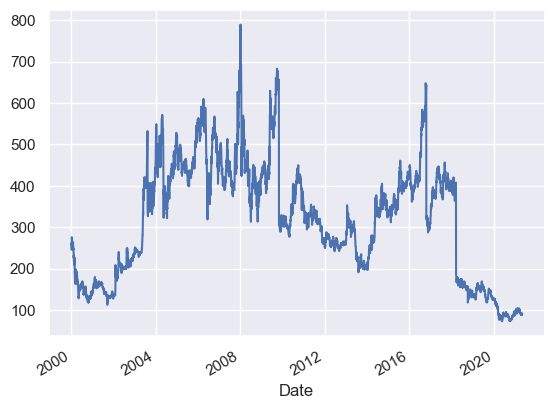

In [29]:
#Plotting 'VWAP' plot of 'IOC'
df2['VWAP'].plot()

In [30]:
df2

,Symbol,Open,High,Low,Close,VWAP,Volume
Date,,,,,,,
2000-01-03,IOC,260.00,273.25,250.00,270.85,258.55,23700
2000-01-04,IOC,260.00,268.00,254.10,264.40,259.80,24400
2000-01-05,IOC,264.90,265.00,257.00,261.30,260.66,18900
2000-01-06,IOC,258.00,263.00,256.05,260.10,259.81,18150
2000-01-07,IOC,259.90,267.00,253.25,264.45,260.11,17650
...,...,...,...,...,...,...,...
2021-04-26,IOC,88.70,88.80,87.75,88.20,88.28,7066681
2021-04-27,IOC,88.20,89.10,88.20,88.85,88.76,8752415
2021-04-28,IOC,89.20,89.55,89.00,89.40,89.29,6336704


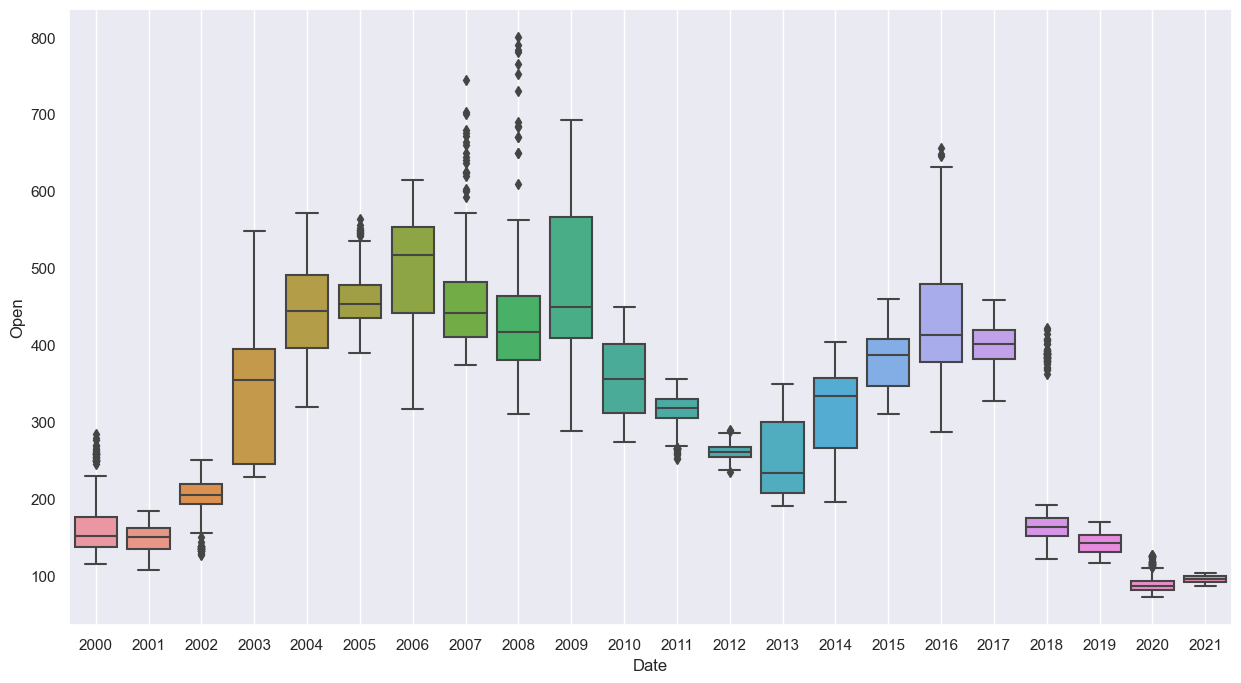

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df2.index.year, y=df2['Open'])
plt.grid()

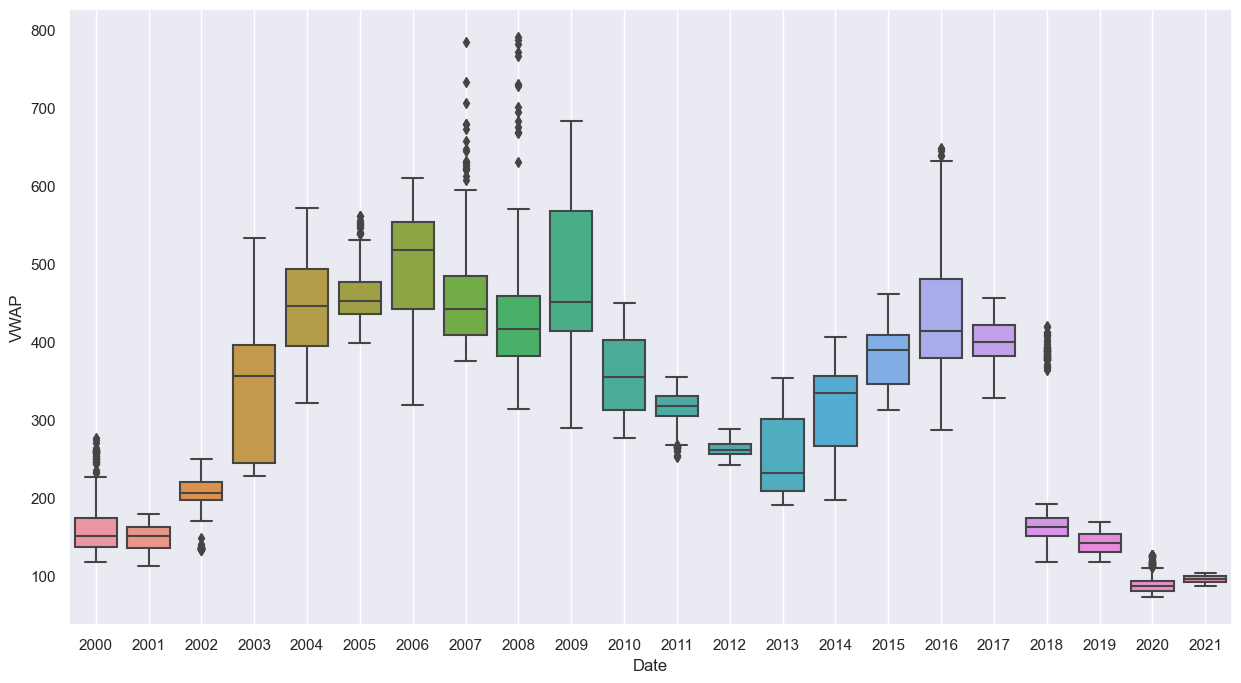

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df2.index.year, y=df2['VWAP'])
plt.grid()

# START CLEANING CODE FROM HERE

In [33]:
df2.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume'], dtype='object')

In [34]:
df_final_model = df2[['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume']]

In [35]:
df_final_model

,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2000-01-03,260.00,273.25,250.00,270.85,258.55,23700
2000-01-04,260.00,268.00,254.10,264.40,259.80,24400
2000-01-05,264.90,265.00,257.00,261.30,260.66,18900
2000-01-06,258.00,263.00,256.05,260.10,259.81,18150
2000-01-07,259.90,267.00,253.25,264.45,260.11,17650
...,...,...,...,...,...,...
2021-04-26,88.70,88.80,87.75,88.20,88.28,7066681
2021-04-27,88.20,89.10,88.20,88.85,88.76,8752415
2021-04-28,89.20,89.55,89.00,89.40,89.29,6336704


In [36]:
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start date of Stocks: ", start_date)
print("End date of stocks: ", end_date)

Start date of Stocks:  2000-01-03 00:00:00
End date of stocks:  2021-04-30 00:00:00


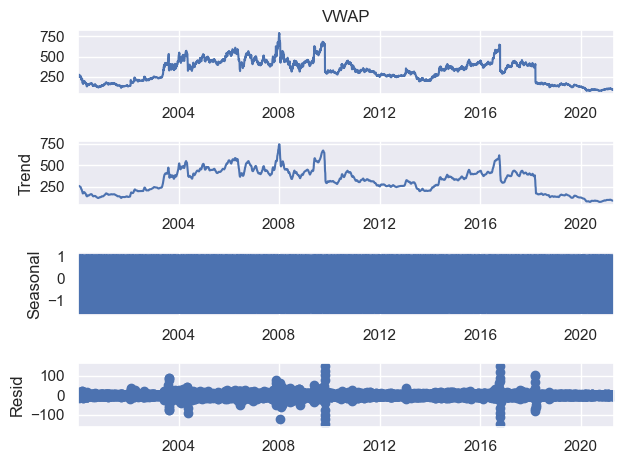

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['VWAP'], model='additive', period=12)
decompose.plot()
plt.show()

In [38]:
trend = decompose.trend
seasonality = decompose.seasonal
residual = decompose.resid

print('Trend', trend.head(10), '\n')
print('seasonality', seasonality.head(10), '\n', '\n')
print('residual', residual.head(10), '\n')

Trend Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
2000-01-10           NaN
2000-01-11    261.526250
2000-01-12    261.534167
2000-01-13    261.325833
2000-01-14    261.044167
Name: trend, dtype: float64 

seasonality Date
2000-01-03    0.896277
2000-01-04    0.510918
2000-01-05    0.509207
2000-01-06    0.577733
2000-01-07    1.053876
2000-01-10   -0.236381
2000-01-11   -1.561285
2000-01-12   -1.068692
2000-01-13   -0.258704
2000-01-14   -0.236927
Name: seasonal, dtype: float64 
 

residual Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-10          NaN
2000-01-11   -14.334965
2000-01-12    -1.515475
2000-01-13    14.892871
2000-01-14    13.222760
Name: resid, dtype: float64 



## Split the data into training and test. Before buinliding the time series forecasting
  

In [39]:
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

,Open,High,Low,Close,VWAP,Volume,Month,Year
Date,,,,,,,,
2000-01-03,260.0,273.25,250.00,270.85,258.55,23700,1,2000
2000-01-04,260.0,268.00,254.10,264.40,259.80,24400,1,2000
2000-01-05,264.9,265.00,257.00,261.30,260.66,18900,1,2000
2000-01-06,258.0,263.00,256.05,260.10,259.81,18150,1,2000
2000-01-07,259.9,267.00,253.25,264.45,260.11,17650,1,2000


In [40]:
df_final_model.tail()

,Open,High,Low,Close,VWAP,Volume,Month,Year
Date,,,,,,,,
2021-04-26,88.70,88.80,87.75,88.20,88.28,7066681,4,2021
2021-04-27,88.20,89.10,88.20,88.85,88.76,8752415,4,2021
2021-04-28,89.20,89.55,89.00,89.40,89.29,6336704,4,2021
2021-04-29,90.25,90.50,88.70,88.90,89.53,8957163,4,2021
2021-04-30,88.60,93.10,88.00,90.85,91.47,29815698,4,2021


In [41]:
df_final_model.index.min()

Timestamp('2000-01-03 00:00:00')

In [42]:
df_final_model.index.max()

Timestamp('2021-04-30 00:00:00')

In [43]:
train_df = df_final_model[pd.to_datetime(df_final_model.index) < pd.to_datetime('2015-03-23')]

#training means : 2000-01-03 to 2015-03-22
#test means : 2015-01-23 to 2021-04-30
test_df = df_final_model[pd.to_datetime(df_final_model.index) >= pd.to_datetime('2015-03-23')]

In [44]:
train_df.head()

,Open,High,Low,Close,VWAP,Volume,Month,Year
Date,,,,,,,,
2000-01-03,260.0,273.25,250.00,270.85,258.55,23700,1,2000
2000-01-04,260.0,268.00,254.10,264.40,259.80,24400,1,2000
2000-01-05,264.9,265.00,257.00,261.30,260.66,18900,1,2000
2000-01-06,258.0,263.00,256.05,260.10,259.81,18150,1,2000
2000-01-07,259.9,267.00,253.25,264.45,260.11,17650,1,2000


In [ ]:
train_final = train_df[['VWAP']]
test_final = test_df[['VWAP']]

In [46]:
train_final.head()

,VWAP
Date,
2000-01-03,258.55
2000-01-04,259.80
2000-01-05,260.66
2000-01-06,259.81
2000-01-07,260.11


In [47]:
test_final.shape

(1511, 1)

In [48]:
test_final.head()

,VWAP
Date,
2015-03-23,343.26
2015-03-24,347.01
2015-03-25,350.53
2015-03-26,351.43
2015-03-27,348.00


In [49]:
#To check Time Series is stationary or not - this is mandatory step.
#Please ensure that data should be stationary.
#How will you check it - Augumented Dickey fuler test
from statsmodels.tsa.stattools import adfuller

In [50]:
adfuller(train_final['VWAP'])

(-3.083440701784114,
 0.027803169580779385,
 1,
 3793,
 {'1%': -3.432075212507756,
  '5%': -2.862302303994175,
  '10%': -2.5671757844911003},
 28353.973104031804)

In [51]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augumented Dickey Fuller Test")
    labels = ['ADF Test', 'P-Value', '#Lags', 'No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + "------>" + str(i))
        
    if result[1] <= 0.05:
        print("Strong Evidence against Null Hypothesis and my time series is Stationary")
        
    else:
        print("Weak Evidence against Null Hypothesis and my time series is Non-Stationary")

In [52]:
check_adftest(train_final['VWAP'])

Augumented Dickey Fuller Test
ADF Test------>-3.083440701784114
P-Value------>0.027803169580779385
#Lags------>1
No. of Observation------>3793
Strong Evidence against Null Hypothesis and my time series is Stationary


In [53]:
#Since my time series is stationary so we are ready to build a Time Series Forecasting Model

import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p,d,q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p,d,q))] #Seasonality 

print("Examples of Parameters combinations for Model.....")
print("Model : {}{}".format(pdq[1], model_pdq[1]))
print("Model : {}{}".format(pdq[0], model_pdq[0]))
print("Model : {}{}".format(pdq[2], model_pdq[2]))
print("Model : {}{}".format(pdq[1], model_pdq[2]))

Examples of Parameters combinations for Model.....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 0)(0, 0, 0, 5)
Model : (0, 0, 2)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 2, 5)


# Builiding SARIMAX model - Seasonality AutoREgressive Integrated Moving Avg with external factor


In [54]:
df_final_model.columns

Index(['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Month', 'Year'], dtype='object')

In [55]:
ex_train = train_df[['Open', 'High', 'Low', 'Close', 'Volume']]
ex_test = test_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [56]:
ex_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,260.0,273.25,250.00,270.85,23700
2000-01-04,260.0,268.00,254.10,264.40,24400
2000-01-05,264.9,265.00,257.00,261.30,18900
2000-01-06,258.0,263.00,256.05,260.10,18150
2000-01-07,259.9,267.00,253.25,264.45,17650


In [57]:
dfobject = pd.DataFrame(columns = ['param', 'seasonal', 'AIC'])
dfobject

,param,seasonal,AIC


In [58]:
#Lets build the model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['VWAP'], exog=ex_train, order = param, 
                                          seasonal_order=param_seasonal, enforce_stationarity= False, 
                                          enforce_invertibility=False)
        result_SARIMAX = model.fit()
        print("SARIMAX{}{} - AIC:{}".format(param, param_seasonal, result_SARIMAX.aic))
        dfobject = dfobject.append({"param":param, "seasonal":param_seasonal,
                                   "AIC":result_SARIMAX.aic}, ignore_index = True)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(0, 0, 0)(0, 0, 0, 5) - AIC:43963.67081423491


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)(0, 0, 1, 5) - AIC:16457.29120303314


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)(0, 0, 2, 5) - AIC:16438.849918487696


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)(1, 0, 0, 5) - AIC:16460.701413944997


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(0, 0, 0)(1, 0, 1, 5) - AIC:16459.587162547497


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)(1, 0, 2, 5) - AIC:16441.08303517409


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)(2, 0, 0, 5) - AIC:16443.43041225247


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)(2, 0, 1, 5) - AIC:16445.60852171598


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)(2, 0, 2, 5) - AIC:16443.68432926645


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(0, 0, 1)(0, 0, 0, 5) - AIC:16471.852611290156


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(0, 0, 1, 5) - AIC:16454.81978773677


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(0, 0, 2, 5) - AIC:16437.194353086208


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(0, 0, 1)(1, 0, 0, 5) - AIC:16462.420488667085


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(1, 0, 1, 5) - AIC:16456.908373703962


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(1, 0, 2, 5) - AIC:16439.4555916693


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(2, 0, 0, 5) - AIC:16445.15686628136


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(2, 0, 1, 5) - AIC:16447.328278918045


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)(2, 0, 2, 5) - AIC:16442.006619324944


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(0, 0, 2)(0, 0, 0, 5) - AIC:16470.08475379765


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 2)(0, 0, 1, 5) - AIC:16453.13453113025


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(0, 0, 2, 5) - AIC:16430.637708200797


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(1, 0, 0, 5) - AIC:16464.06556198423


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(1, 0, 1, 5) - AIC:16455.153231234675


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(1, 0, 2, 5) - AIC:16433.77567064597


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(2, 0, 0, 5) - AIC:16446.790624734884


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(2, 0, 1, 5) - AIC:16448.955999233534


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)(2, 0, 2, 5) - AIC:16437.01454678673


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(1, 0, 0)(0, 0, 0, 5) - AIC:16477.441534134065


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)(0, 0, 1, 5) - AIC:16459.01464106506


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)(0, 0, 2, 5) - AIC:16440.579040238652


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(1, 0, 0)(1, 0, 0, 5) - AIC:16459.03718309446


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)(1, 0, 1, 5) - AIC:16461.315921082267


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)(1, 0, 2, 5) - AIC:16442.80690625874


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)(2, 0, 0, 5) - AIC:16440.630017189647


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)(2, 0, 1, 5) - AIC:16442.911425256636


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)(2, 0, 2, 5) - AIC:16445.400247887486


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(1, 0, 1)(0, 0, 0, 5) - AIC:16477.081864746255


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1)(0, 0, 1, 5) - AIC:16459.061551906896


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(0, 0, 2, 5) - AIC:16440.32431637908


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(1, 0, 0, 5) - AIC:16462.812028801767


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(1, 0, 1, 5) - AIC:16460.92343506148


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(1, 0, 2, 5) - AIC:16442.835744462158


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(2, 0, 0, 5) - AIC:16446.43653527401


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(2, 0, 1, 5) - AIC:16448.66984400148


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)(2, 0, 2, 5) - AIC:16445.76323353628


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 2)(0, 0, 0, 5) - AIC:16470.94482879986


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(0, 0, 1, 5) - AIC:16453.6918964736


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(0, 0, 2, 5) - AIC:16433.23313891841


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(1, 0, 0, 5) - AIC:16460.70652639283


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(1, 0, 1, 5) - AIC:16455.620194522715


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(1, 0, 2, 5) - AIC:16436.466657923906


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(2, 0, 0, 5) - AIC:16444.311869679106


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(2, 0, 1, 5) - AIC:16446.56623879303


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 2)(2, 0, 2, 5) - AIC:16439.1814927063


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anacon

SARIMAX(2, 0, 0)(0, 0, 0, 5) - AIC:16473.49914335935


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(0, 0, 1, 5) - AIC:16460.685890775807


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(0, 0, 2, 5) - AIC:16442.2194495329


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(1, 0, 0, 5) - AIC:16456.48712048356


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(1, 0, 1, 5) - AIC:16458.567585764264


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(1, 0, 2, 5) - AIC:16444.44317140513


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(2, 0, 0, 5) - AIC:16438.881167107706


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(2, 0, 1, 5) - AIC:16441.202009413722


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 0)(2, 0, 2, 5) - AIC:16443.66623940837


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(0, 0, 0, 5) - AIC:22057.119567204758


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 1)(0, 0, 1, 5) - AIC:22031.258664225552


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(0, 0, 2, 5) - AIC:22005.482945487267


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(1, 0, 0, 5) - AIC:22031.28285441642


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(1, 0, 1, 5) - AIC:22033.570043282583


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(1, 0, 2, 5) - AIC:22007.71077952932


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(2, 0, 0, 5) - AIC:22005.53472815905


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(2, 0, 1, 5) - AIC:22007.817706088972


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 1)(2, 0, 2, 5) - AIC:22010.296037950284


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(0, 0, 0, 5) - AIC:16472.726534464477


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(0, 0, 1, 5) - AIC:16455.811879584016


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(0, 0, 2, 5) - AIC:16434.662510656344


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(1, 0, 0, 5) - AIC:16459.18503643423


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(1, 0, 1, 5) - AIC:16457.664757581748


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(1, 0, 2, 5) - AIC:16437.811330124656


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(2, 0, 0, 5) - AIC:16439.113237087342


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(2, 0, 1, 5) - AIC:16441.97470531404


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)(2, 0, 2, 5) - AIC:16440.866313386723


In [59]:
dfobject.sort_values(['AIC'])

,param,seasonal,AIC
20,"(0, 0, 2)","(0, 0, 2, 5)",16430.637708
47,"(1, 0, 2)","(0, 0, 2, 5)",16433.233139
23,"(0, 0, 2)","(1, 0, 2, 5)",16433.775671
74,"(2, 0, 2)","(0, 0, 2, 5)",16434.662511
50,"(1, 0, 2)","(1, 0, 2, 5)",16436.466658
...,...,...,...
64,"(2, 0, 1)","(0, 0, 1, 5)",22031.258664
66,"(2, 0, 1)","(1, 0, 0, 5)",22031.282854
67,"(2, 0, 1)","(1, 0, 1, 5)",22033.570043
63,"(2, 0, 1)","(0, 0, 0, 5)",22057.119567


In [60]:
# (0, 0, 2)	(0, 0, 2, 5)	16430.637708
model = sm.tsa.statespace.SARIMAX(train_final['VWAP'], exog=ex_train, order = (0,0,2), 
                                          seasonal_order=(0, 0, 2, 5), enforce_stationarity= False, 
                                          enforce_invertibility=False)
result = model.fit()
print(result.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                              VWAP   No. Observations:                 3795
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -8205.319
Date:                           Thu, 08 May 2025   AIC                          16430.638
Time:                                   19:34:59   BIC                          16493.018
Sample:                                        0   HQIC                         16452.813
                                          - 3795                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.0032      0.002      1.470      0.142      -0.001       0.007
High           0.3196      0.003    111.455

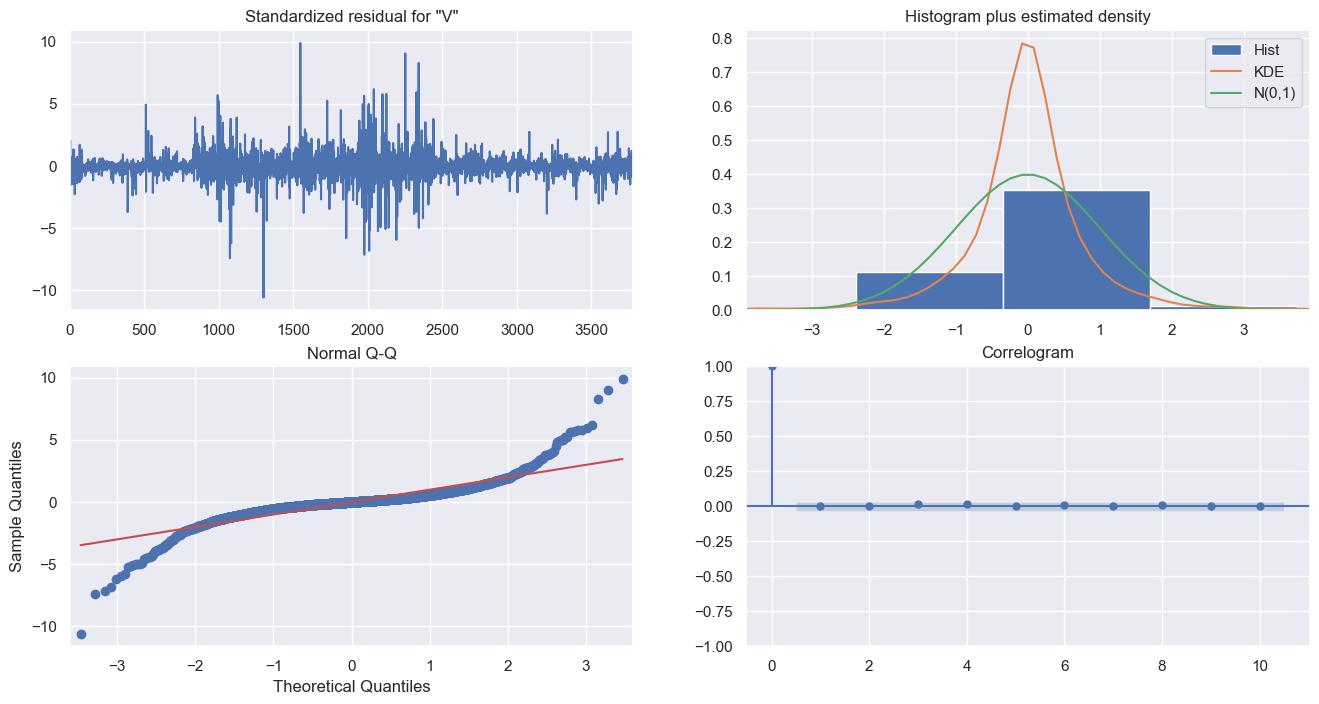

In [61]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

In [62]:
pred_SARIMAX = result.get_forecast(steps=len(test_df), exog=ex_test)
pred_SARIMAX.predicted_mean

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3795    342.655022
3796    346.756841
3797    350.872333
3798    350.959524
3799    346.935061
           ...    
5301     89.203744
5302     89.926793
5303     90.166241
5304     90.548377
5305     94.992208
Name: predicted_mean, Length: 1511, dtype: float64

In [63]:
from sklearn.metrics import *
from math import sqrt 

In [64]:
rmse = sqrt(mean_squared_error(test_final.VWAP, pred_SARIMAX.predicted_mean, squared=False))
print(rmse)

1.5475305159869097


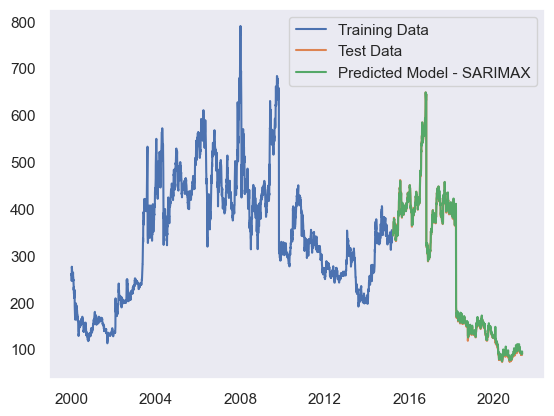

In [65]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.legend(loc='best')
plt.grid()

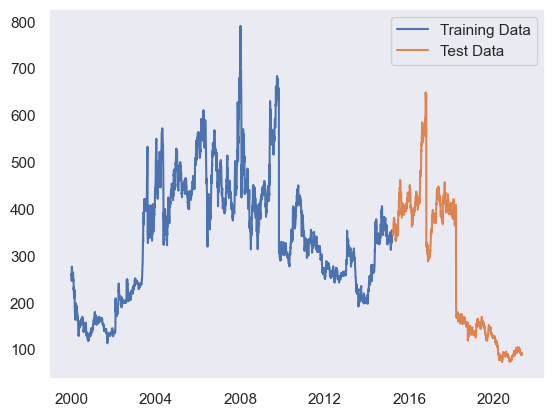

In [66]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.legend(loc='best')
plt.grid()

# SARIMA MODEL

In [67]:
model = sm.tsa.statespace.SARIMAX(train_final['VWAP'], order = (0,0,2),
                                          seasonal_order=(0, 0, 2, 5), enforce_stationarity= False, 
                                          enforce_invertibility=False)
result = model.fit()
print(result.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                              VWAP   No. Observations:                 3795
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 5)   Log Likelihood              -19747.673
Date:                           Thu, 08 May 2025   AIC                          39505.347
Time:                                   19:35:08   BIC                          39536.537
Sample:                                        0   HQIC                         39516.434
                                          - 3795                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.5893      0.003    454.912      0.000       1.582       1.596
ma.L2          0.9557      0.003    289.851

In [68]:
pred_SARIMA = result.get_forecast(steps=len(test_df), exog=ex_test)
pred_SARIMA.predicted_mean

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3795    300.557119
3796    267.639899
3797    255.978417
3798    257.878917
3799    239.075471
           ...    
5301      0.000000
5302      0.000000
5303      0.000000
5304      0.000000
5305      0.000000
Name: predicted_mean, Length: 1511, dtype: float64

In [69]:
rmse = sqrt(mean_squared_error(test_final.VWAP, pred_SARIMA.predicted_mean, squared=False))
print(rmse)

17.35137960325468


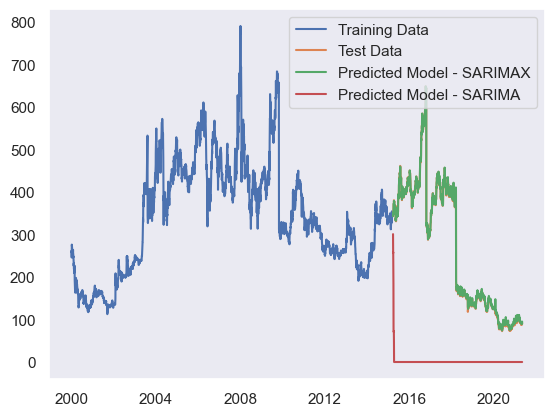

In [70]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Model - SARIMA')
plt.legend(loc='best')
plt.grid()

# ARIMA


In [71]:
model = sm.tsa.statespace.SARIMAX(train_final['VWAP'], order = (0,0,2), enforce_stationarity= False, 
                                          enforce_invertibility=False)
result = model.fit()
print(result.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   VWAP   No. Observations:                 3795
Model:               SARIMAX(0, 0, 2)   Log Likelihood              -22947.723
Date:                Thu, 08 May 2025   AIC                          45901.446
Time:                        19:35:11   BIC                          45920.168
Sample:                             0   HQIC                         45908.100
                               - 3795                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.8100      0.005    342.397      0.000       1.800       1.820
ma.L2          0.9215      0.005    174.235      0.000       0.911       0.932
sigma2      1.055e+04    346.152     30.476      0.0

In [72]:
pred_ARIMA = result.get_forecast(steps=len(test_df), exog=ex_test)
pred_ARIMA.predicted_mean

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3795    243.878048
3796     78.186586
3797      0.000000
3798      0.000000
3799      0.000000
           ...    
5301      0.000000
5302      0.000000
5303      0.000000
5304      0.000000
5305      0.000000
Name: predicted_mean, Length: 1511, dtype: float64

In [73]:
rmse = sqrt(mean_squared_error(test_final.VWAP, pred_ARIMA.predicted_mean, squared=False))
print(rmse)

17.37536873977622


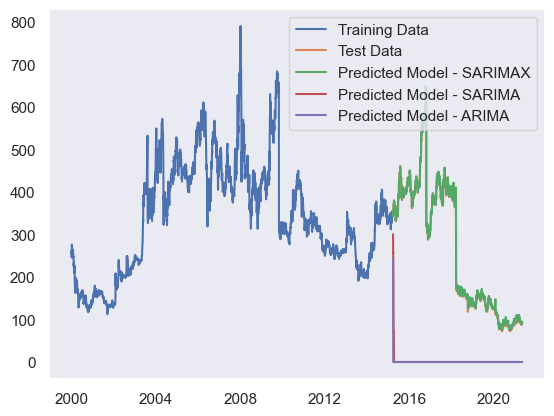

In [74]:
plt.plot(train_final, label="Training Data")
plt.plot(test_final, label="Test Data")
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Model - SARIMA')
plt.plot(test_final.index, pred_ARIMA.predicted_mean, label='Predicted Model - ARIMA')

plt.legend(loc='best')
plt.grid()

# Conclusion : SARIMAX is an excellent base line model where delivereing promising results. However, if you want more powerful model
# please use facebook prophet model or LSTM or DARTS